**Install tensorflow**

In [37]:
%pip install --user ipykernel

In [38]:
%pip install --user tensorflow==2.18.0

Note: you may need to restart the kernel to use updated packages.


### Import tensorflow, keras modules

In [39]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from scipy.special import softmax
from tensorflow.keras import datasets, layers, models


print(tf.__version__)
print(tf.keras.__version__)

2.18.0
3.6.0


### Import CIFAR-10 Dataset automatically

TensorFlow Datasets: https://www.tensorflow.org/api_docs/python/tf/keras/datasets\
Dataset explanations https://keras.io/datasets/

In [69]:
data_set = tf.keras.datasets.cifar10
data_set_100 = tf.keras.datasets.cifar100

Encode, Normalize and Split data

# CIFAR-10 Dataset

In [71]:
# Load training data, labels; and testing data and their true labels
(train_images, train_labels), (test_images, test_labels) = data_set.load_data()

# Normalize input between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0


# CIFAR-100 Dataset

In [72]:
# Load training data, labels; and testing data and their true labels
(train_images_100, train_labels_100), (test_images_100, test_labels_100) = data_set_100.load_data()

# Normalize input between 0 and 1
train_images_100 = train_images_100 / 255.0
test_images_100 = test_images_100 / 255.0

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [79]:
# Check shapes of train_images, train_labels etc
print(train_images_100.shape)
print(train_labels_100.shape)
print(test_images_100.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


### Visualize the dataset

In [74]:
# For printing, we name each of the 10 classes below
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [85]:
# Define the labels in CIFAR-100's order
class_names_100 = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail',
    'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
    'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train',
    'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf',
    'woman', 'worm'
]

## CIFAR-10 Dataset Overview

CIFAR-10 is a widely-used benchmark dataset in machine learning that serves as a standard testing ground for computer vision algorithms.

### Dataset Properties:
- **Image Size**: 32x32 RGB images (3 color channels)
- **Classes**: 10 mutually exclusive classes
- **Training Set**: 50,000 images (5,000 per class)
- **Test Set**: 10,000 images (1,000 per class)
- **Total Size**: 60,000 labeled images

### Classes:
1. **Natural Objects**:
  - Bird
  - Cat
  - Deer
  - Dog
  - Frog
  - Horse
2. **Artificial Objects**:
  - Airplane
  - Automobile
  - Ship
  - Truck

### Key Characteristics:
1. **Balanced Dataset**:
  - Equal number of images per class
  - No class imbalance issues

2. **Challenging Aspects**:
  - Low resolution images
  - Real-world variations in object appearance
  - Different backgrounds and orientations
  - Multiple objects may appear in one image

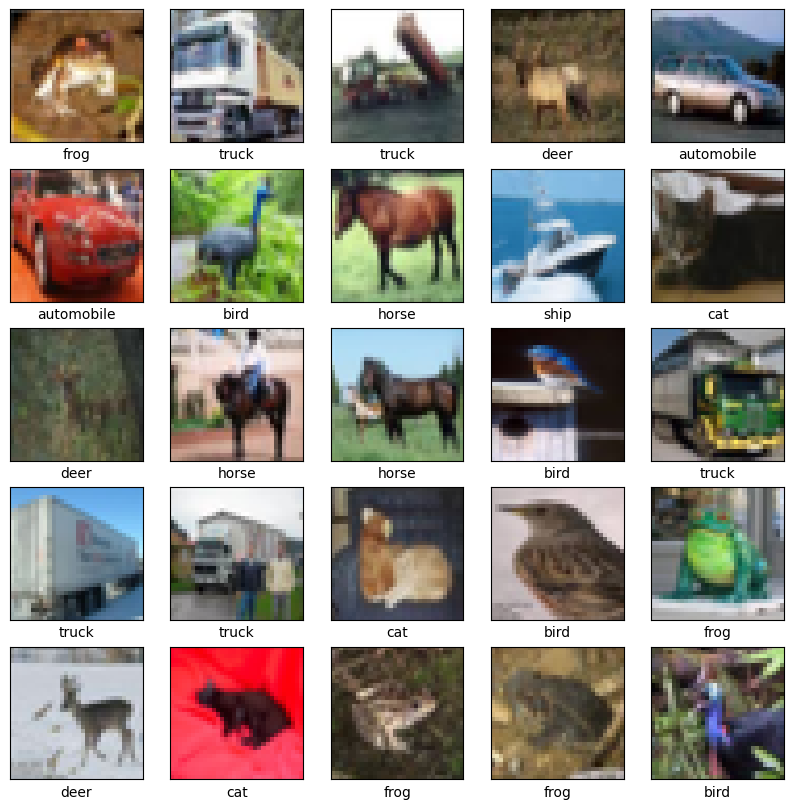

In [76]:

plt.figure(figsize=(10, 10))

train_labels_arr = np.array(train_labels)
train_images_arr = np.array(train_images)

for i in range(25):  
    plt.subplot(5, 5, i + 1)
    plt.xticks([])  # Hide x ticks
    plt.yticks([])  # Hide y ticks
    plt.grid(False)  # Turn off grid
    plt.imshow(train_images_arr[i]) 
    plt.xlabel(class_names[train_labels_arr[i][0]])  # Label with class name from label (not index)
    
plt.show()

## CIFAR-100 Dataset Overview

CIFAR-100 is an extension of the CIFAR-10 dataset, offering a more challenging image classification task with finer-grained categories.

### Key Differences from CIFAR-10:
- **Number of Classes**: While CIFAR-10 has 10 broad categories, CIFAR-100 contains 100 specific classes
- **Hierarchical Structure**: CIFAR-100 organizes its 100 classes into 20 superclasses, with each superclass containing 5 fine-grained classes
- **Training Examples**: Both datasets have 50,000 training and 10,000 test images, but CIFAR-100 has fewer images per class (500 vs 5,000 in CIFAR-10)

### Dataset Properties:
- **Image Size**: 32x32 RGB images (same as CIFAR-10)
- **Training Set**: 50,000 images (500 per class)
- **Test Set**: 10,000 images (100 per class)
- **Label Types**: 
 - Fine labels (100 classes)
 - Coarse labels (20 superclasses)

### Challenges:
1. More difficult classification task due to:
  - More classes to distinguish between
  - Fewer examples per class
  - Finer-grained distinctions required
2. Higher potential for confusion between similar classes
3. Generally lower accuracy rates compared to CIFAR-10 for equivalent models

First few labels: [19 29  0 11  1]
Corresponding classes: ['cattle', 'dinosaur', 'apple', 'boy', 'aquarium_fish']


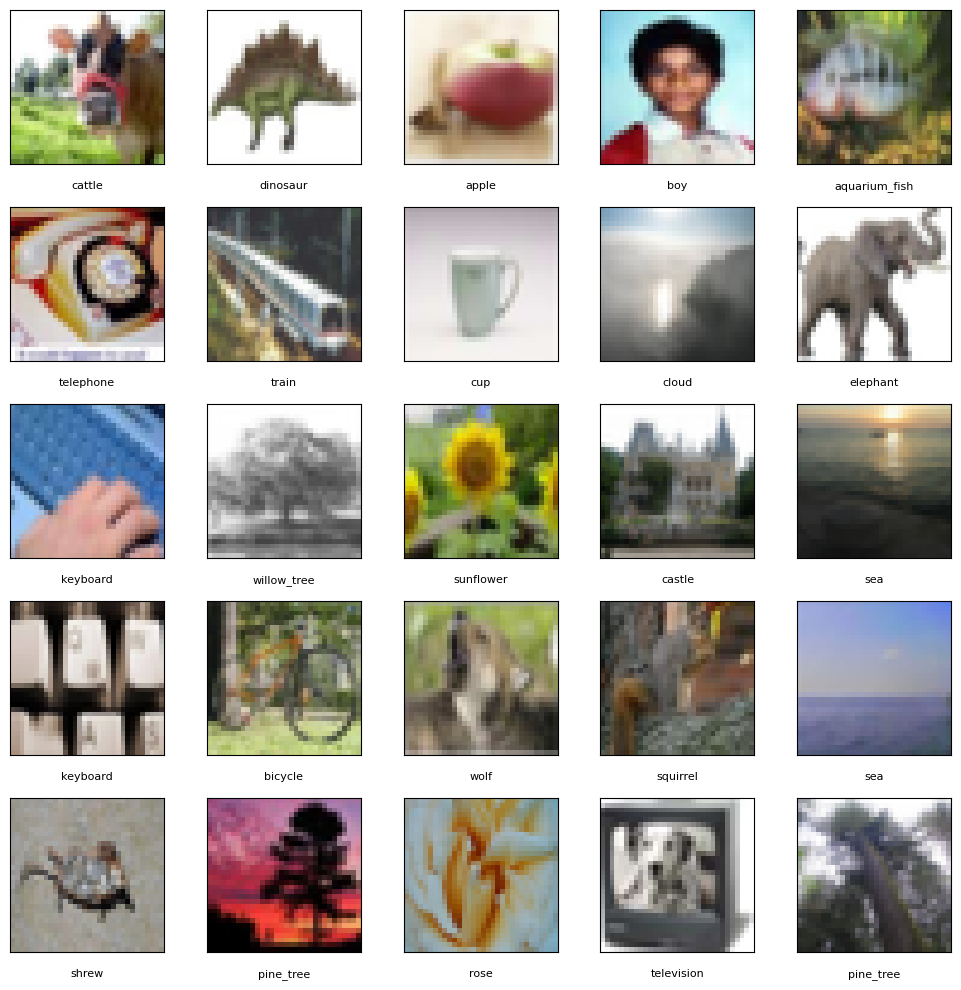

In [ ]:
# Create visualization
plt.figure(figsize=(10, 10))

for i in range(25):  
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Display image
    plt.imshow(train_images_100[i])
    
    # Print both index and name to debug
    class_idx = train_labels_100[i][0]
    plt.xlabel(f"\n{class_names_100[class_idx]}", fontsize=8)

plt.tight_layout()
plt.show()

# Multi-Class Logistic Regression

Implementation of a multi-class logistic regression model using:

- Mini-batch gradient descent 
- L2 regularization
- Softmax activation
- Categorical cross-entropy loss

The `train` method fits the model to the data, while `predict` classifies new samples.

In [57]:
class MultiClassLogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=500, batch_size=32, reg_lambda=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_lambda = reg_lambda
        self.errors = []
        self.weights = None
        self.bias = None
        # Initialize Keras loss function
        self.loss_fn = tf.keras.losses.CategoricalCrossentropy()

    def softmax(self, z):
        shifted_logits = z - np.max(z, axis=1, keepdims=True)
        exp_scores = np.exp(shifted_logits)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def compute_loss(self, y_true, y_pred):
        y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)
        return self.loss_fn(y_true, y_pred).numpy()

    def train(self, X, y):
        # Reshape the input data 

        X = X.reshape(X.shape[0], -1)
        m, n = X.shape
        # Conver labels to one-hot encoding 
        y = tf.keras.utils.to_categorical(y, num_classes=10)
        
        # Initialize weights 
        self.weights = np.random.randn(n, y.shape[1]) * np.sqrt(2.0 / n)
        self.bias = np.zeros((1, y.shape[1]))
        
        initial_lr = self.learning_rate

        for epoch in range(self.epochs):
            # Use a lerning rate schedule to speed up convergence
            self.learning_rate = initial_lr / (1 + epoch * 0.01)
            
            # Shuffle the data randomly
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Use mini batch training (batch size 32)
            for i in range(0, m, self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]
                
                # Forward pass
                logits = np.dot(X_batch, self.weights) + self.bias
                y_pred = self.softmax(logits)
                
                # Backward pass with L2 regularization to reduce overfitting
                grad_logits = y_pred - y_batch
                grad_weights = (np.dot(X_batch.T, grad_logits) / self.batch_size + 
                              self.reg_lambda * self.weights)
                grad_bias = np.mean(grad_logits, axis=0, keepdims=True)
                
                # Update weights and bias
                self.weights -= self.learning_rate * grad_weights
                self.bias -= self.learning_rate * grad_bias

            # Compute training error
            y_pred = self.softmax(np.dot(X, self.weights) + self.bias)
            train_error = self.compute_loss(y, y_pred)
            self.errors.append(train_error)
            
            # Print out progress every 50 epochs
            if epoch % 50 == 0:
                train_acc = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y, axis=1))
                print(f"Epoch {epoch} - Loss: {train_error:.4f}, Accuracy: {train_acc:.4f}")

    def predict(self, X):
        if len(X.shape) > 2:
            X = X.reshape(X.shape[0], -1)
        logits = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(logits)
        return np.argmax(y_pred, axis=1)

Starting training...
Epoch 0 - Loss: 7.6695, Accuracy: 0.2438
Epoch 50 - Loss: 4.5476, Accuracy: 0.2716
Epoch 100 - Loss: 5.8805, Accuracy: 0.2004
Epoch 150 - Loss: 3.7526, Accuracy: 0.2575
Epoch 200 - Loss: 2.3991, Accuracy: 0.2833
Epoch 250 - Loss: 2.1453, Accuracy: 0.3265

Test accuracy: 27.10%


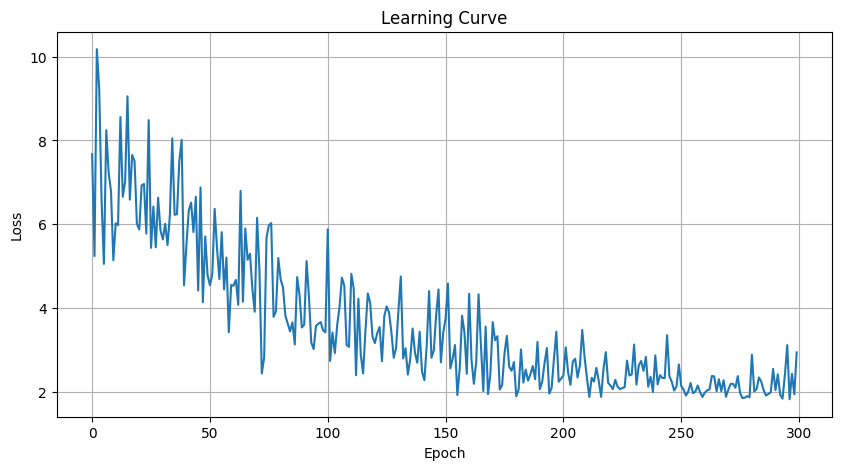

In [58]:
# Initialize model
model = MultiClassLogisticRegression(
    learning_rate=0.1,
    epochs=300,
    batch_size=32,
    reg_lambda=0.01
)

# Train
print("Starting training...")
model.train(train_images, train_labels)

# Evaluate
predictions = model.predict(test_images)
accuracy = np.mean(predictions == test_labels.ravel())
print(f"\nTest accuracy: {accuracy * 100:.2f}%")

# Plot learning curve
plt.figure(figsize=(10, 5))
plt.plot(model.errors)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.grid(True)
plt.show()

An overall ~5% improvement in test accuracy was achieved by incorporating methods such as mini batch training, L2 regularization, and a learning rate scheduler. Overall test accuracy is almost 27.10%. Despite attempts to improve this result it is clear that multi-class logistic regression is not performant on image data. Regardless, exploring different tecniques to manipulate and improve the results was a useful excercise.

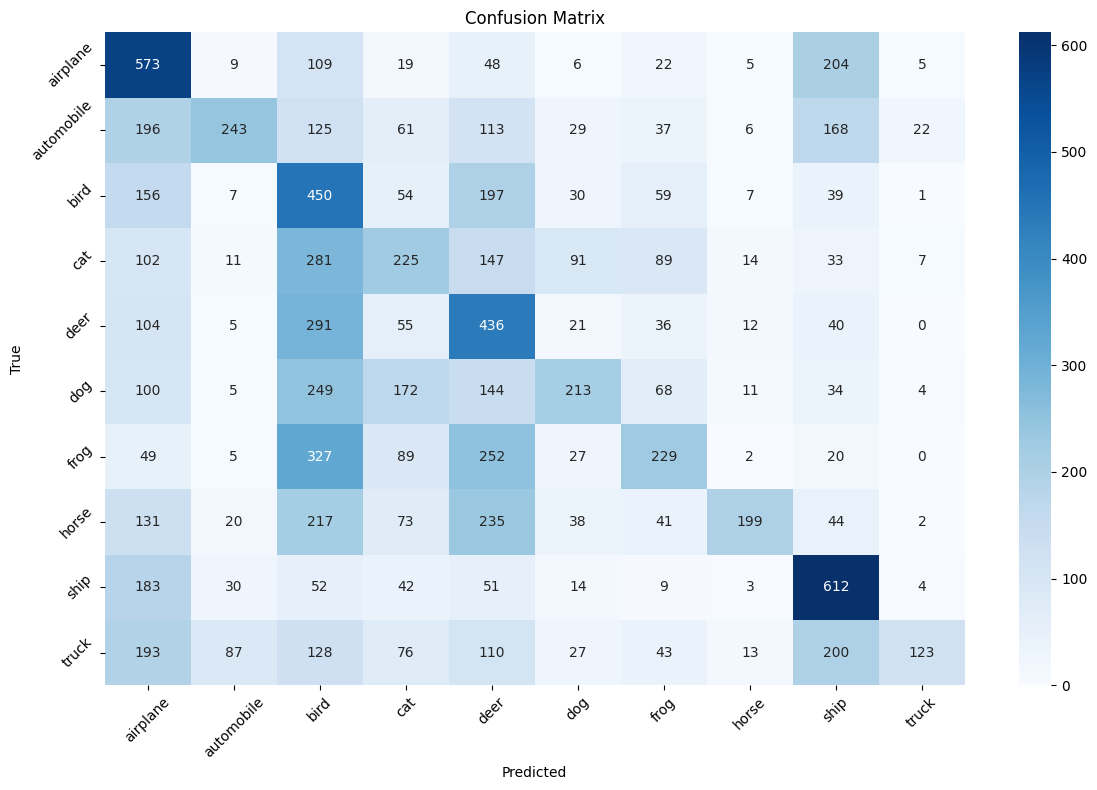

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Plot confusion matrix using seaborn.
    
    Parameters:
    y_true: True labels
    y_pred: Predicted labels
    class_names: List of class names for labels
    """
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create figure and axes
    plt.figure(figsize=(12, 8))
    
    # Create heatmap
    sns.heatmap(cm, 
                annot=True,  # Show numbers in cells
                fmt='d',     # Use integer format
                cmap='Blues',  # Blue color scheme
                xticklabels=class_names,
                yticklabels=class_names)
    
    # Add labels
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    
    # Rotate x-labels for better readability
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(test_labels, predictions, class_names)


Top Correlated Class Pairs:
cat         dog      0.756912
bird        ship     0.741954
            deer     0.604652
deer        ship     0.579838
airplane    deer     0.532306
bird        frog     0.508749
airplane    cat      0.495423
            bird     0.492708
frog        ship     0.469660
airplane    frog     0.459721
automobile  bird     0.430275
cat         ship     0.416339
automobile  truck    0.363263
bird        truck    0.347926
airplane    dog      0.343497
dtype: float64

Condition number of correlation matrix: 5.597687464669568e+16


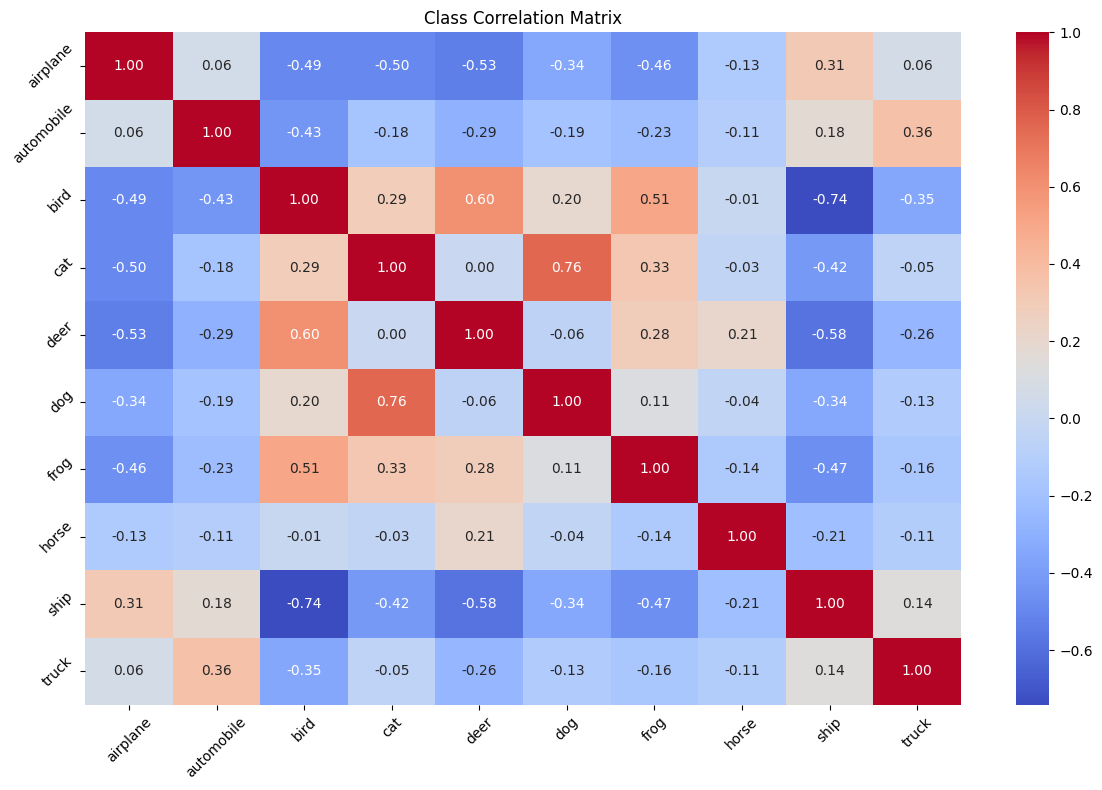

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(test_labels, predictions)

df = pd.DataFrame(cm, columns=class_names, index=class_names)

# Calculate correlation matrix
corr_matrix = df.corr()
abs_corr_matrix = corr_matrix.abs()

# Get correlation pairs
corr_pairs = abs_corr_matrix.unstack().drop_duplicates()
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs = sorted_pairs[sorted_pairs != 1]  # Remove self-correlations

print("Top Correlated Class Pairs:")
print(sorted_pairs.iloc[0:15])  # Top 15 correlations

print("\nCondition number of correlation matrix:", 
     np.linalg.cond(corr_matrix))

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
           annot=True, 
           fmt='.2f', 
           cmap='coolwarm',
           xticklabels=class_names,
           yticklabels=class_names)

plt.title('Class Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis of Class Correlations in CIFAR-10 Classification

Our analysis of the correlation matrix reveals several interesting patterns in the model's classification behavior. The strongest correlations are observed between semantically related classes, suggesting that the model's errors follow interpretable patterns.

### Key Findings:

1. **Strongest Correlations**:
  - Cat-Dog pair (r = 0.757) shows the highest correlation, which is expected given their similar visual features
  - Bird-Ship pair (r = 0.742) exhibits surprisingly high correlation, potentially due to background context
  - Bird-Deer (r = 0.605) represents moderate correlation among animal classes

2. **Notable Patterns**:
  - Animal classes (cat, dog, bird, deer) tend to show higher inter-correlations
  - Vehicle classes (airplane, automobile, truck) demonstrate lower correlation coefficients
  - The ship class shows unexpected correlations with multiple animal classes

3. **Weakest Correlations**:
  - Automobile-Truck (r = 0.363) shows surprisingly low correlation despite semantic similarity
  - Bird-Truck (r = 0.348) and Airplane-Dog (r = 0.343) represent some of the lowest correlations

These correlations suggest that while the model has learned meaningful features for classification, it may be overly sensitive to certain visual patterns that are shared across semantically different classes. The high correlation between birds and ships, for instance, might indicate that the model is putting undue emphasis on background features like sky or water.

Further investigation into the specific features driving these correlations could provide insights for improving model performance, particularly in distinguishing between highly correlated classes.

**K Nearest Neighbors Model**

In [59]:


train_images = train_images.reshape(train_images.shape[0], -1)  
test_images = test_images.reshape(test_images.shape[0], -1) 
pca = PCA(n_components=100) 
train_images_pca = pca.fit_transform(train_images)
test_images_pca = pca.transform(test_images)


k_values = [1, 3]

results = []

for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(train_images, train_labels)
    
    # Predict on the test set
    predictions = knn.predict(test_images)
    
    # Evaluate the accuracy
    accuracy = accuracy_score(test_labels, predictions)
    results.append((k, accuracy))

for k, accuracy in results:
    print(f'k = {k}, Accuracy = {accuracy * 100:.2f}%')

c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k = 1, Accuracy = 35.39%
k = 3, Accuracy = 33.03%


**Nearest Local Centroid**

# Convolutional Neural Network Model #

##### Model Architecture #####
The CNN model consists of two sets of convolutional layers, each followed by batch normalization, max pooling, and dropout. The output is flattened and passed through two dense layers for classification.

#### Batch Normalization ####
Batch normalization normalizes the activations of each layer, reducing internal covariate shift and improving training speed and stability. It helps regulate activations and gradients throughout the network.

#### Intuition Behind the Model Structure ####

**Convolutional Layers**: Extract features from low-level edges to high-level shapes and objects. 

**Max Pooling**: Used to reduce spatial dimensions 

**Dropout**: Introduces regularization, preventing overfitting 

**Dense Layers**: Act as a classifier, combining learned features to make final predictions.


In [108]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 893,226 (3.41 MB)

 Trainable params: 891,818 (3.40 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [109]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation (add rotations, shifting, flipping, and zooming to improve model generalization)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(train_images)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.3121 - loss: 2.1089 - val_accuracy: 0.4656 - val_loss: 1.4690
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.4510 - loss: 1.5169 - val_accuracy: 0.5904 - val_loss: 1.1283
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5063 - loss: 1.3729 - val_accuracy: 0.5123 - val_loss: 1.4568
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.5415 - loss: 1.2927 - val_accuracy: 0.6123 - val_loss: 1.1049
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.5730 - loss: 1.2072 - val_accuracy: 0.5920 - val_loss: 1.1694
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.5923 - loss: 1.1571 - val_accuracy: 0.6522 - val_loss: 1.0072
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6046 - loss: 1.1160 - val_accuracy: 0.6516 - val_loss: 1.0084
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 

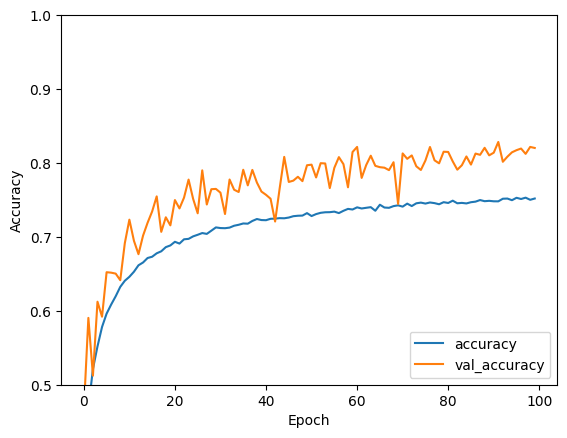

In [111]:
# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=100,
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)



In [116]:
# Saveing the model to prevent retraining!!
model.save('model.keras')  
# Save the training history
import pickle

with open('training_history.pkl', 'wb') as f:
  pickle.dump(history.history, f)

313/313 - 3s - 9ms/step - accuracy: 0.8203 - loss: 0.5245
Test accuracy: 0.8202999830245972


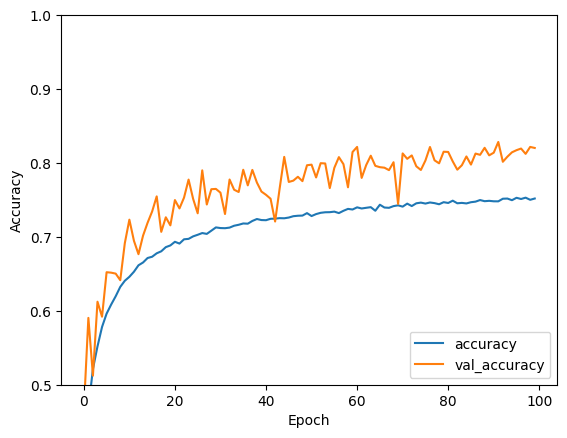

In [119]:
# Load the saved model
loaded_model = load_model('model.keras')

# Evaluate the loaded model on the test set
test_loss, test_acc = loaded_model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

# Load the training history
import pickle

with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot the training and validation accuracy
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


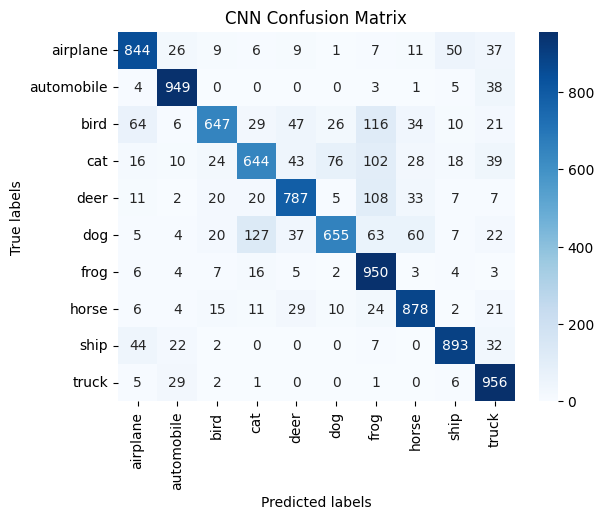

In [120]:
# Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('CNN Confusion Matrix')
plt.show()

In [ ]:
cm = confusion_matrix(test_labels, predictions)

df = pd.DataFrame(cm, columns=class_names, index=class_names)

# Calculate correlation matrix
corr_matrix = df.corr()
abs_corr_matrix = corr_matrix.abs()

# Get correlation pairs
corr_pairs = abs_corr_matrix.unstack().drop_duplicates()
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs = sorted_pairs[sorted_pairs != 1]  # Remove self-correlations

print("Top Correlated Class Pairs:")
print(sorted_pairs.iloc[0:15])  # Top 15 correlations

## Train CNN on CIFAR-100 Dataset

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 39ms/step - accuracy: 0.2034 - loss: 3.3761 - val_accuracy: 0.4182 - val_loss: 2.1808
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.3257 - loss: 2.5916 - val_accuracy: 0.4404 - val_loss: 2.0985
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.3441 - loss: 2.5231 - val_accuracy: 0.4498 - val_loss: 2.0757
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.3570 - loss: 2.4829 - val_accuracy: 0.4530 - val_loss: 2.0516
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.3580 - loss: 2.4455 - val_accuracy: 0.4793 - val_loss: 1.9270
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.3608 - loss: 2.4370 - val_accuracy: 0.4696 - val_loss: 1.9967
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.3637 - loss: 2.4206 - val_accuracy: 0.4598 - val_loss: 2.0307
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 

AttributeError: Line2D.set() got an unexpected keyword argument 'label_'

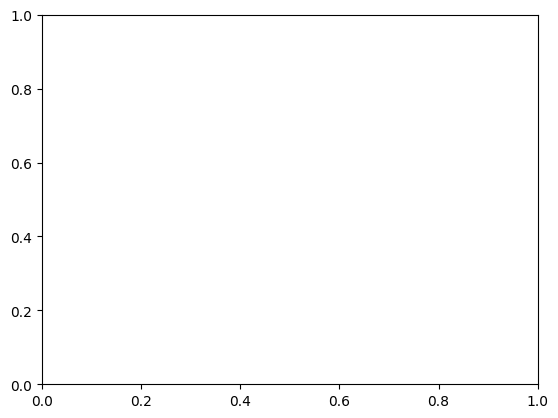

In [131]:
# Modify the model for CIFAR-100
model.pop()  # Remove the last layer (Dense with 10 units)
model.add(layers.Dense(100, activation='softmax'))  # Add new output layer

# Recompile the model with the updated structure
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Data augmentation (add rotations, shifting, flipping, and zooming to improve model generalization)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(train_images)
# Train the model with data augmentation
history = model.fit(datagen.flow(train_images_100, train_labels_100, batch_size=32),
                    epochs=100,
                    validation_data=(test_images_100, test_labels_100))

plt.plot(history.history['accuracy'], label_='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss_100, test_acc_100 = model.evaluate(test_images_100, test_labels_100, verbose=2)
print(test_acc_100)

In [133]:
# Saveing the model to prevent retraining!!
model.save('model_cifar100.keras')  
# Save the training history
import pickle

with open('training_history_cifar100.pkl', 'wb') as f:
  pickle.dump(history.history, f)


313/313 - 3s - 9ms/step - accuracy: 0.5419 - loss: 1.6792
Test accuracy: 0.5418999791145325


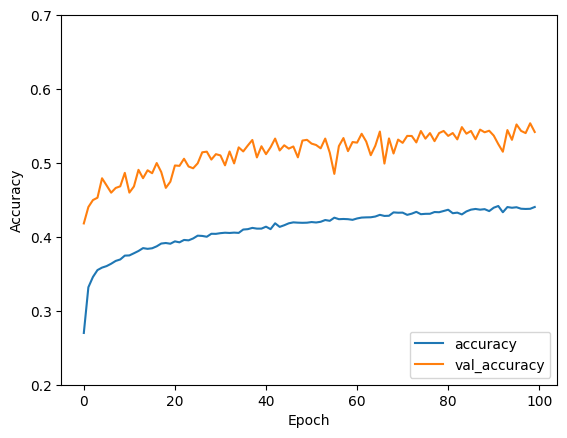

In [136]:
# Load the saved model
loaded_model = load_model('model_cifar100.keras')

# Evaluate the loaded model on the test set
test_loss_100, test_acc_100 = loaded_model.evaluate(test_images_100, test_labels_100, verbose=2)
print('Test accuracy:', test_acc_100)

# Load the training history
import pickle

with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot the training and validation accuracy
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 0.7])
plt.legend(loc='lower right')
plt.show()

Plot Comparison - 3 Models

In [140]:
#F1 Score, Precision, Accuracy
from sklearn.metrics import accuracy_score, precision_score, f1_score
# Calculate metrics for each model
accuracy = [
    accuracy_score(test_labels_100, predictions),
]
precision = [
    precision_score(test_labels_100, predictions, average='weighted'),

]
f1 = [
    f1_score(test_labels_100, predictions, average='weighted'),
]

# Create a DataFrame for plotting

df = pd.DataFrame({'Model': model, 'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1})
df = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better visualization
plt.legend(loc='lower right')
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

**Conclusion**